# The Economics of FAD fishing

Samples, K. C., & Sproul, J. T. (1985). Fish aggregating devices and open-access commercial fisheries: a theoretical inquiry. *Bulletin of Marine Science*, 37(1), 305-317.

Note there are a number of errors in this paper and the related paper Clark, C. W., & Mangel, M. (1979). Aggregation and fishery dynamics: a theoretical study of schooling and the purse seine tuna fisheries. Fish. Bull, 77(2), 317-337.
should be consulted for clarification.

- N stock size

- Q school size at FAD

- K is the number of FADs assumed to be homogeneous

$$\frac{dQ}{dt} = a N  - bQ(t)$$

where $bQ(t)$ is the outflow to the main population from an individual FAD and is proportional to the size of the school aggregated on the FAD.

$$\frac{dKQ}{dt} = \frac{dS}{dt} = a KN - b KQ$$
$$ = a KN - bS$$

where $S = KQ$. $S$ is the fish population aggregated around the netowk of FADs with $S \leq N$. 

Catch or fishing mortality is given by

$h = q_0 E_0 S$

Combining these and assuming fishing is occurring we get

$$\frac{dS}{dt} = a KN - bS - q_0 E_0 S$$


The dynmaics of the background fish stock is given by

$$\frac{dN}{dt} = rN (1 - \frac{N}{\bar{N}}) + bS$$

Fishing mortality on the underlying stock is given by

$$g_1 = q_1 E_1 N$$

Combining these we get


$$\frac{dN}{dt} = rN (1 - \frac{N}{\bar{N}}) + b S  - q_1 E_1 N$$



Samples and Sproul then assume an equilibrium with no migration between the FADs and the rest of the school and a costant stock $\frac{dS}{dt} = \frac{dN}{dt} = 0$.








In [286]:
from sympy import *
a, b, K, N, q0, E0, S, r, N, NN, q1, E1, S1 = symbols('a b K N q0 E0 S r N NN q1 E1 S1')

eq1 = a*K*N - b*S - q0*E0*S
eq2 = r*N*(1-N/NN) + b*S - q1*E1*N
sol = solve({eq1,eq2},{S,N})
sol[1]

{N: -NN*(E0*E1*q0*q1 - E0*q0*r + E1*b*q1 - K*a*b - b*r)/(r*(E0*q0 + b)),
 S: -K*NN*a*(E0*E1*q0*q1 - E0*q0*r + E1*b*q1 - K*a*b - b*r)/(r*(E0*q0 + b)**2)}

In [287]:
N = simplify(sol[1][N])
N

NN*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b))

In [288]:
S = simplify(sol[1][S])
S

K*NN*a*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)

In [289]:
simplify(S)

K*NN*a*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)

# Catch 

In [290]:
h = q0*S*E0
h

E0*K*NN*a*q0*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)

In [291]:
g = q1*S*E1
g

E1*K*NN*a*q1*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)

E0*K*NN*a*q0*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)


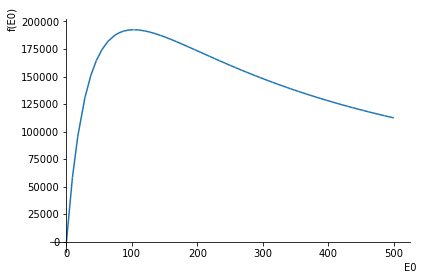

In [292]:
from sympy.plotting import plot
E1 = 800

K = 300
NN = 1000
q0 = 0.001
q1 = 0.001
b = 0.1
a = 0.1
r = 1.2
print(h)
plot(E0*K*NN*a*q0*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2),(E0 ,0,500))



E1*K*NN*a*q1*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2)


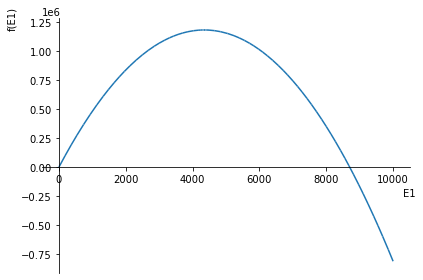

In [293]:
print(g)
E1 = Symbol('E1')
E0 = 300
plot(E1*K*NN*a*q1*(-E0*E1*q0*q1 + E0*q0*r - E1*b*q1 + K*a*b + b*r)/(r*(E0*q0 + b)**2),(E1,0,10000))

# Rent